In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import *
import seaborn as sns
import pickle
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.layouts import column, row, layout
from bokeh.io import output_file, show
from bokeh.layouts import widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn

In [24]:
clustering_data = pickle.load(open("clustering_data.pck", "rb"))
#clustering_data

In [25]:
def license_bar_plot(df,upto=20,save=None):
    lic_list = []
    count = []
    for license in np.unique(df['LICNFELD']):
        lic_list.append(license)
        count.append(len(df[df['LICNFELD']==license]))
    lic_count = pd.DataFrame(np.array(count).T,columns=['count'],index=lic_list)
    lic_count.sort_values('count',inplace=True,ascending=False)
    lic_count[:upto].plot(kind='bar',figsize=(20,10))
    if save!=None:
        plt.savefig(save, dpi=300)
    #plt.show()
    return lic_count

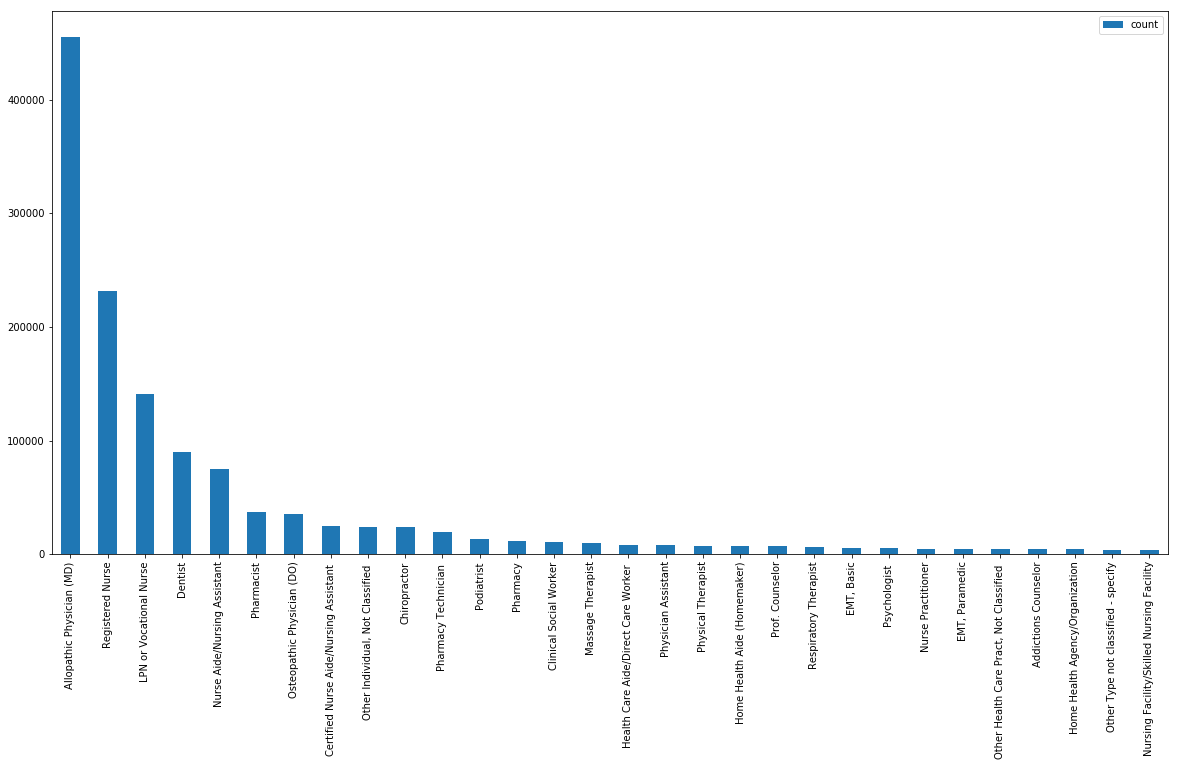

In [26]:
lic_count = license_bar_plot(clustering_data,upto=30,save=None)

In [27]:
output_file("bars.html")

fruits = list(lic_count.index)[:30]

p = figure(x_range=fruits, plot_height=600, title="Number of Malpractice Cases for the Riskiest License Fields in the US",
           toolbar_location=None, tools="")

p.vbar(x=fruits, top=list(lic_count['count'])[:30], width=0.9)

p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = 1
p.y_range.start = 0

data = dict(
        fields=list(lic_count.index),
        count=list(lic_count['count']),
    )
source = ColumnDataSource(data)

columns = [
        TableColumn(field="fields", title="License Field"),
        TableColumn(field="count", title="Number of Malpractice Cases")
    ]
data_table = DataTable(source=source, columns=columns, width=500, height=500)

show(row(p,widgetbox(data_table)))

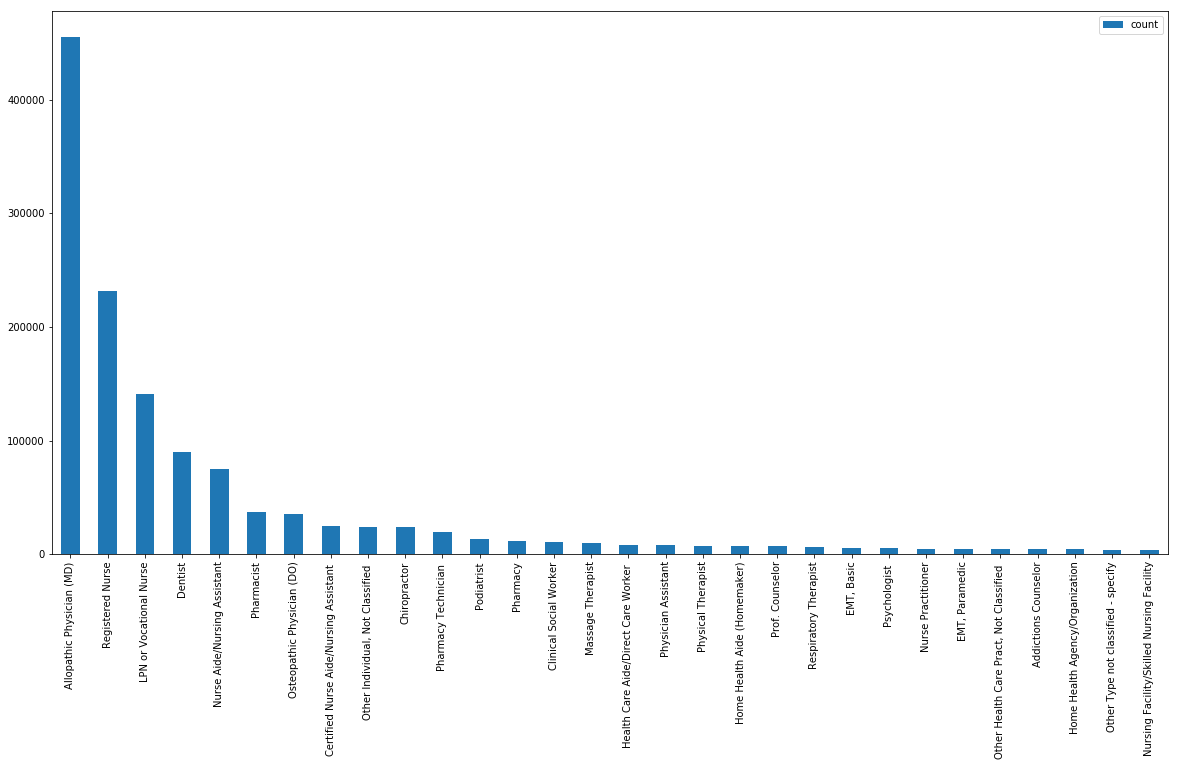

In [31]:
from bokeh.embed import components 
lic_count = license_bar_plot(clustering_data,upto=30)
fruits = list(lic_count.index)[:30]
p = figure(x_range=fruits,
               plot_height=600,
               title="Number of Malpractice Cases for the High-Risk License Fields in the US",
               toolbar_location=None,
               tools="")
p.vbar(x=fruits, top=list(lic_count['count'])[:30], width=0.9)
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = 1
p.y_range.start = 0
data = dict(
        fields=list(lic_count.index),
        count=list(lic_count['count']),
)
source = ColumnDataSource(data)
columns = [
        TableColumn(field="fields", title="License Field"),
        TableColumn(field="count", title="Number of Malpractice Cases")
    ]
data_table = DataTable(source=source, columns=columns, width=500, height=500)

plot = layout([p,widgetbox(data_table)])

#script, div = components(layout)
show(plot)